## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [20]:
# Before we start EDA, let's connect to the remote database.
#Import python library
import psycopg2
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import requests
from scipy.stats import ttest_ind



In [3]:
# Since we will be extracting the data from the tables multiple times, instead of writing the same code multiple times, I created a function.
def query_table_to_csv(tablename, db_host, db_name, db_user, db_password, output_path, row_limit=None):
    # create a connection object
    conn = psycopg2.connect(
        host=db_host,
        database=db_name,
        user=db_user,
        password=db_password
    )

    # create a cursor object
    cursor = conn.cursor()

    
    # execute a query to select rows from the specified table
    query = f"SELECT * FROM {tablename} TABLESAMPLE SYSTEM (10)"
    if row_limit:
        query += f" LIMIT {row_limit}"
    cursor.execute(query)

    print(query)

    # fetch the results
    results = cursor.fetchall()

    # create a DataFrame from the results
    df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])

    # close the cursor and connection
    cursor.close()
    conn.close()

    # save the DataFrame to a CSV file
    df.to_csv(output_path, index=False)

    # print a message to confirm success
    print(f"Results saved to {output_path}")

In [18]:
## Total number of rows = 15,927,485
# set the database connection parameters
db_host = "lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com"
db_name = "mid_term_project"    
db_user = "lhl_student"
db_password = "lhl_student"

In [80]:
# Importing Flights data
query_table_to_csv(
    tablename="flights",
    db_host=db_host,
    db_name=db_name,
    db_user=db_user,
    db_password=db_password,
    output_path="c:/Taslim/LHL/Mid_term Project/flights.csv",
    row_limit=10000000
)

SELECT * FROM flights TABLESAMPLE SYSTEM (10) LIMIT 100
Results saved to c:/Taslim/LHL/Mid_term Project/flights1.csv


In [5]:
# Importing the saved CSV file into dataframe
flights_df = pd.read_csv("c:/Taslim/LHL/Mid_term Project/flights.csv")

# print the first few rows of the DataFrame
flights_df.head()

C:\Users\niles\AppData\Local\Temp\ipykernel_14292\3685631337.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv("c:/Taslim/LHL/Mid_term Project/flights.csv")


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,B6,B6,B6,469,B6,N645JB,469,10721,BOS,...,1237.0,17.0,0.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2018-01-01,B6,B6,B6,470,B6,N589JB,470,11697,FLL,...,1237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,B6,B6,B6,471,B6,N827JB,471,10721,BOS,...,2689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,B6,B6,B6,472,B6,N827JB,472,14831,SJC,...,2689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,B6,B6,B6,475,B6,N655JB,475,14307,PVD,...,1072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Importing Passenger data
query_table_to_csv(
    tablename="passengers",
    db_host=db_host,
    db_name=db_name,
    db_user=db_user,
    db_password=db_password,
    output_path="c:/Taslim/LHL/Mid_term Project/passengers.csv",
    row_limit=100
)

SELECT * FROM passengers TABLESAMPLE SYSTEM (10) LIMIT 100
Results saved to c:/Taslim/LHL/Mid_term Project/passengers.csv


In [79]:
# Importing the saved CSV file into dataframe
passengers_df = pd.read_csv("c:/Taslim/LHL/Mid_term Project/passengers.csv")

# print the first few rows of the DataFrame
passengers_df.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,3.0,64500.0,0.0,0.0,10537.0,0.0,468.0,265.0,202.0,...,MX,Mexico,6,635,2,2019,6,1,P,IU
1,0.0,1.0,30000.0,0.0,0.0,4560.0,0.0,468.0,90.0,75.0,...,MX,Mexico,6,640,2,2019,6,1,P,IU
2,0.0,1.0,60000.0,0.0,0.0,5206.0,0.0,468.0,85.0,65.0,...,MX,Mexico,7,715,2,2019,6,1,P,IU
3,0.0,1.0,21500.0,0.0,0.0,4504.0,0.0,405.0,93.0,68.0,...,MX,Mexico,6,635,2,2019,6,1,P,IU
4,0.0,1.0,30000.0,0.0,0.0,0.0,0.0,128.0,55.0,40.0,...,MX,Mexico,6,640,2,2019,6,1,P,IU


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

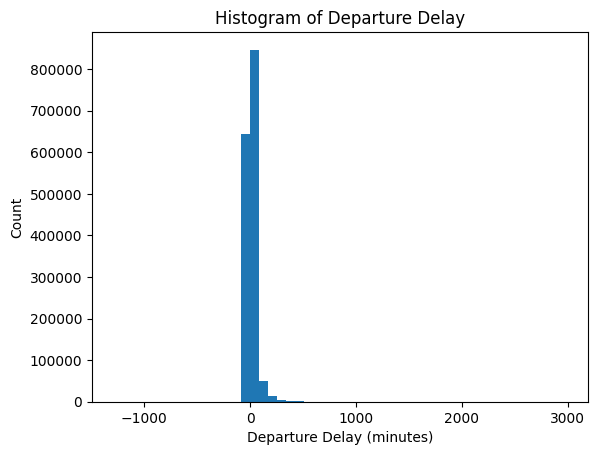

In [6]:
# plot a histogram of the dep_delay column
plt.hist(flights_df['dep_delay'], bins=50)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Departure Delay')
plt.show()

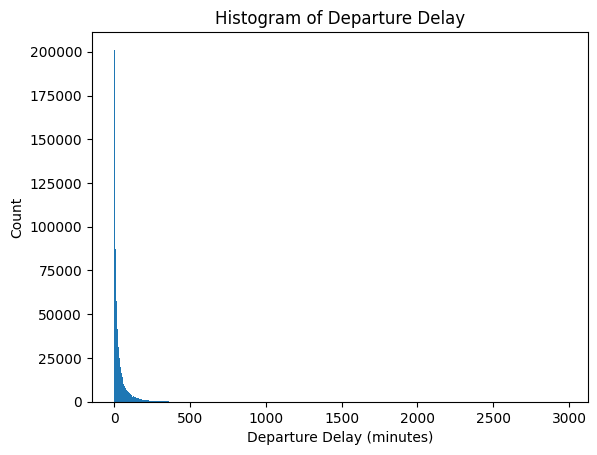

In [7]:
# Since we are insterested only in delayed flights, select only the rows where dep_delay is greater than or equal to zero. 
df = flights_df[flights_df['dep_delay'] >= 0]

# plot a histogram of the dep_delay column
plt.hist(df['dep_delay'], bins=500)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Count')
plt.title('Histogram of Departure Delay')
plt.show()

In [8]:
# perform the Shapiro-Wilk test on the flight_delay column
stat, p = shapiro(df['dep_delay'])

# print the test statistic and p-value
print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"p-value: {p:.4f}")

# interpret the results
alpha = 0.05
if p > alpha:
    print("The null hypothesis of normality cannot be rejected.")
else:
    print("The null hypothesis of normality is rejected.")

Shapiro-Wilk test statistic: 0.4788
p-value: 0.0000
The null hypothesis of normality is rejected.


C:\Users\niles\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

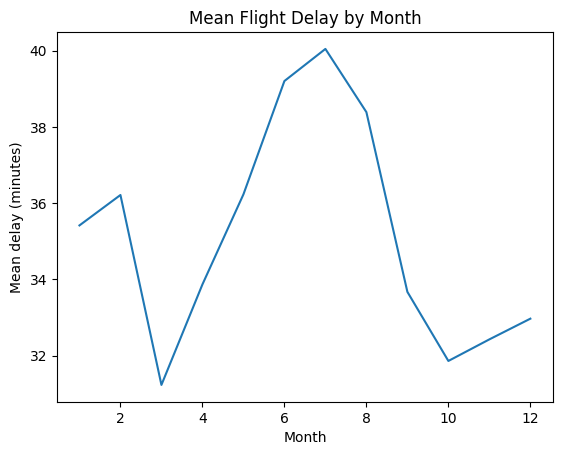

In [9]:
# convert the fl_date column to a datetime object
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'])

# group the DataFrame by month and calculate the mean dep_delay for each month
monthly_mean_delay = df.groupby(flights_df['fl_date'].dt.month)['dep_delay'].mean()

#print(monthly_mean_delay)

# plot the monthly mean delay as a line chart
monthly_mean_delay.plot(kind='line')

# add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Mean delay (minutes)')
plt.title('Mean Flight Delay by Month')
plt.show()

In [ ]:
#It seems the summer months have higher delays followed by winter ones.
#The probable reasons for summer month can be peak traffic season. More people travel in summer months are compared to other seasons, which can be the contribuitor for delays.
#The probable reason for winter months can be weather. During winter seasons, NY has snowy weather and it can potentially add to delays.

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [28]:
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/new%20york/2018-01-01/2019-12-31?unitGroup=us&key&contentType=json"

response = requests.get(url)
print(response)

<Response [401]>


In [29]:
# Importing the saved CSV file into dataframe
weather_df = pd.read_csv("c:/Taslim/LHL/Mid_term Project/new_york_weather.csv")

# print the first few rows of the DataFrame
weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,new york,2018-01-01,23.8,10.0,16.3,22.7,-1.0,8.0,3.7,58.0,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.50,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
1,new york,2018-01-02,28.9,15.9,21.0,19.1,1.6,9.1,9.6,61.4,...,9.0,5,NaN,2018-01-02T07:20:15,2018-01-02T16:40:11,0.52,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KEWR,KLGA,KJRB,KNYC,F1..."
2,new york,2018-01-03,32.9,17.9,24.7,30.1,5.7,16.3,10.7,55.8,...,7.9,4,NaN,2018-01-03T07:20:18,2018-01-03T16:41:04,0.55,"Snow, Rain",Clear conditions throughout the day with rain ...,snow,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
3,new york,2018-01-04,31.8,21.8,26.7,25.0,14.4,19.6,19.7,75.9,...,0.9,1,NaN,2018-01-04T07:20:19,2018-01-04T16:41:58,0.59,"Snow, Rain, Overcast",Cloudy skies throughout the day with a chance ...,snow,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417,7..."
4,new york,2018-01-05,23.7,11.8,17.1,17.2,2.9,8.5,4.9,58.8,...,9.6,5,NaN,2018-01-05T07:20:18,2018-01-05T16:42:54,0.62,Clear,Clear conditions throughout the day.,snow,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"


In [31]:
# convert date columns to datetime
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'])
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# merge dataframes on date column
merged_df = pd.merge(flights_df, weather_df, left_on='fl_date', right_on='datetime', how='outer')

merged_df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2018-01-01,B6,B6,B6,469,B6,N645JB,469,10721,BOS,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.5,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
1,2018-01-01,B6,B6,B6,470,B6,N589JB,470,11697,FLL,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.5,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
2,2018-01-01,B6,B6,B6,471,B6,N827JB,471,10721,BOS,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.5,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
3,2018-01-01,B6,B6,B6,472,B6,N827JB,472,14831,SJC,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.5,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"
4,2018-01-01,B6,B6,B6,475,B6,N655JB,475,14307,PVD,...,9.2,5,NaN,2018-01-01T07:20:10,2018-01-01T16:39:19,0.5,Clear,Clear conditions throughout the day.,clear-day,"72505394728,72055399999,KLGA,KJRB,KNYC,F1417"


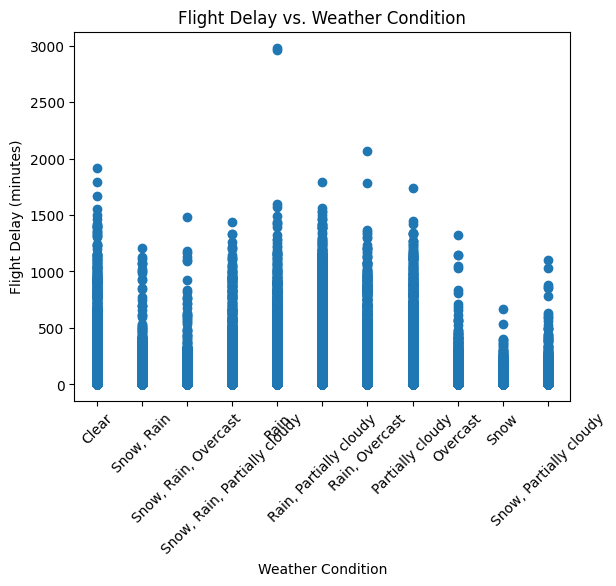

In [39]:
# Since we are insterested only in delayed flights, select only the rows where dep_delay is greater than or equal to zero. 
merged_df = merged_df[merged_df['dep_delay'] >= 0]

# create a scatter plot of delay by conditions
plt.scatter(merged_df['conditions'], merged_df['dep_delay'])

# set plot title and axis labels
plt.title('Flight Delay vs. Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Flight Delay (minutes)')

# rotate x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.show()

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [10]:
# Create a new column called 'hour' and fill it with 0
flights_df['hour'] = '00'

flights_df['crs_dep_time'] = flights_df['crs_dep_time'].astype(str)

# Find the rows where the length is less than or equal to 4
mask = flights_df['crs_dep_time'].str.len() <= 4

# Extract the first one or two digits and set them as the value in the 'hour' column
df.loc[mask, 'hour'] = flights_df.loc[mask, 'crs_dep_time'].str[:-2]

# Output the results
flights_df.head()

C:\Users\niles\AppData\Local\Temp\ipykernel_14292\2839705627.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask, 'hour'] = flights_df.loc[mask, 'crs_dep_time'].str[:-2]


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,hour
0,2018-01-01,B6,B6,B6,469,B6,N645JB,469,10721,BOS,...,17.0,0.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,00
1,2018-01-01,B6,B6,B6,470,B6,N589JB,470,11697,FLL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00
2,2018-01-01,B6,B6,B6,471,B6,N827JB,471,10721,BOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00
3,2018-01-01,B6,B6,B6,472,B6,N827JB,472,14831,SJC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00
4,2018-01-01,B6,B6,B6,475,B6,N655JB,475,14307,PVD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00


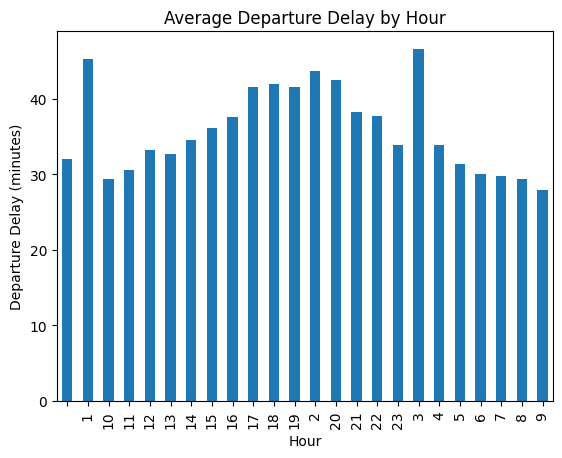

In [11]:

# Group the data by hour and calculate the mean departure delay
hourly_delay = df.groupby('hour')['dep_delay'].mean()

# Create a bar plot of the hourly delays
hourly_delay.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Average Departure Delay by Hour')
plt.xlabel('Hour')
plt.ylabel('Departure Delay (minutes)')

# Show the plot
plt.show()

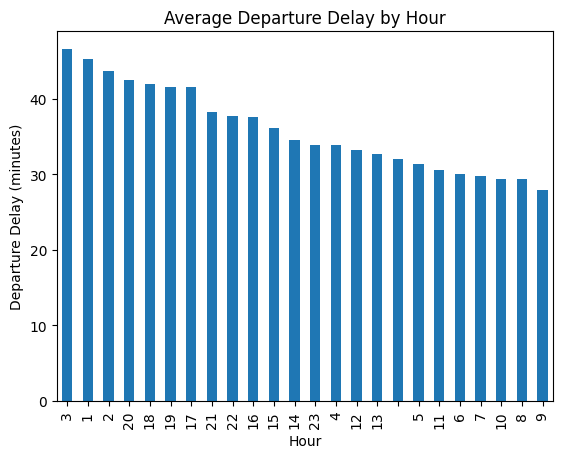

In [12]:
# Group the data by hour and calculate the mean departure delay
hourly_delay = df.groupby('hour')['dep_delay'].mean()

# Sort the hourly delay values in descending order and get the sorted index
sorted_idx = hourly_delay.sort_values(ascending=False).index

# Create a bar plot of the hourly delays, using the sorted index for the bar order
ax = hourly_delay.loc[sorted_idx].plot(kind='bar')

# Set the plot title and axis labels
ax.set_title('Average Departure Delay by Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Departure Delay (minutes)')

# Show the plot
plt.show()

In [ ]:
#The taxi time changes the delay. It seems the late night flights have longer delays as compared to rest flights.

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [13]:
# Filter the rows where arr_delay and dep_delay are both greater than 0
delayed_flights = flights_df[(flights_df['arr_delay'] > 0) & (flights_df['dep_delay'] > 0)]

# Calculate the percentage of delayed flights
delay_percentage = len(delayed_flights) / len(df) * 100

print(f"Percentage of delayed flights: {delay_percentage:.2f}%")

Percentage of delayed flights: 63.75%


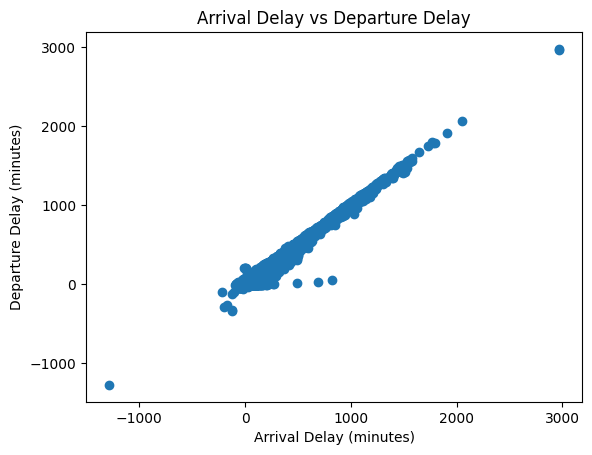

In [14]:
# Correlation between arrival delay and departure delay
# Even if we ignore the outliers in the data, there is a very high correlation between arrival and departure delays. The airlines are not able to cover the arrival delays in departure time.
plt.scatter(flights_df['arr_delay'], flights_df['dep_delay'])

plt.title('Arrival Delay vs Departure Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)')

plt.show()

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [15]:
# add new column C by dividing A by B
flights_df['speed'] = flights_df['distance'] / flights_df['air_time']

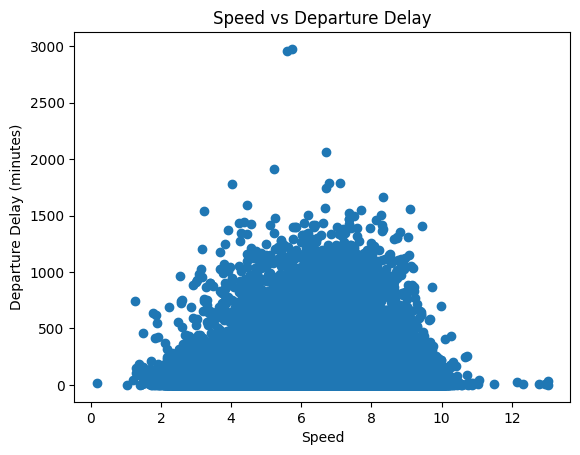

In [19]:
# Since we are insterested only in delayed flights, select only the rows where dep_delay is greater than or equal to zero. 
df = flights_df[flights_df['dep_delay'] >= 0]


# Even if we ignore the outliers in the data, there is a very high correlation between arrival and departure delays. The airlines are not able to cover the arrival delays in departure time.
plt.scatter(df['speed'], df['dep_delay'])

plt.title('Speed vs Departure Delay')
plt.xlabel('Speed')
plt.ylabel('Departure Delay (minutes)')

plt.show()

In [22]:
# separate the data into two groups based on dep_delay, excluding missing values
no_delay = flights_df[flights_df['dep_delay'].fillna(0) == 0]['speed'].dropna()
delayed = flights_df[flights_df['dep_delay'].fillna(0) > 0]['speed'].dropna()

# perform a t-test to compare the means of the two groups
t, p = ttest_ind(no_delay, delayed)

# print the results
print('t =', t)
print('p =', p)

t = 9.250544466119544
p = 2.240419465807097e-20


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?